In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from google.colab import files
import os
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

In [2]:
!unzip -q 'drive/MyDrive/Нейросети/music.zip'


In [3]:
music = os.listdir('Audio_Files')

!ls Audio_Files

Major  Minor


In [4]:
def get_features(y, sr):

  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
  mfcc = librosa.feature.mfcc(y=y, sr=sr)

  rmse=np.mean(librosa.feature.rms(y=y)[0])
  spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
  spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
  rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
  zcr = np.mean(librosa.feature.zero_crossing_rate(y))



  out = []
  out.append(rmse)
  out.append(spec_cent)
  out.append(spec_bw)
  out.append(rolloff)
  out.append(zcr)

  for e in mfcc:
    out.append(np.mean(e))

  for e in chroma_stft:
    out.append(np.mean(e))

  return out

In [5]:
import time

X_train = []
Y_train = []

curr_time = time.time()

for i in range(len(music)):
  g = music[i]

  for filename in os.listdir(f'./Audio_Files/{g}'):

    songname = f'./Audio_Files/{g}/{filename}'

    y, sr = librosa.load(songname, mono=True, duration=30)

    out = get_features(y, sr)


    X_train.append(out)

    Y_train.append(to_categorical(i, len(music)))


  print("Тональность ", g, " готова -> ", round(time.time() - curr_time), "c", sep="")
  curr_time = time.time()



Тональность Major готова -> 48c
Тональность Minor готова -> 26c


In [6]:
X_train = np.array((X_train), dtype=object)
Y_train = np.array((Y_train), dtype=object)

In [7]:
X_train_backup = X_train.copy()
Y_train_backup = Y_train.copy()

In [8]:
y_train_class = np.argmax(Y_train, axis=1)
print(y_train_class)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(y_train_class.shape)

(859, 37)
(859, 2)
(859,)


In [13]:
scaler = StandardScaler()

In [14]:
print(X_train)

[[0.12713358 681.5819347856483 720.1752629249 ... 0.4575792 0.43211982
  0.278583]
 [0.116838604 694.080892743765 681.1646188082426 ... 0.110103495 0.271105
  0.07502847]
 [0.12597708 623.6803170375197 702.3721002673119 ... 0.19730937
  0.12930216 0.20740227]
 ...
 [0.102075875 457.9346169476705 741.7794428581684 ... 0.32707956
  0.14025816 0.2339091]
 [0.08376505 567.754817816985 929.0297197963378 ... 0.062987044
  0.13624774 0.6142175]
 [0.13982277 677.9220038134475 688.3959973650836 ... 0.054347057
  0.19799569 0.80202395]]


In [15]:
print(Y_train)

[[1.0 0.0]
 [1.0 0.0]
 [1.0 0.0]
 ...
 [0.0 1.0]
 [0.0 1.0]
 [0.0 1.0]]


In [16]:
columns = ['dense','neuron','drop','BN','activation','batch_size','acc','val_acc']

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
print(X_train[0])

[ 0.49601628  0.68826487 -0.67353177  0.60401136  0.76277703  1.19214027
  1.25589306 -1.07948455 -0.21763789 -0.67525496 -0.94005062 -0.80841526
 -0.92826738 -1.04821014 -0.68038636 -0.14723551  0.07879062 -0.47318647
 -1.11949087 -1.28334608 -1.13669636 -0.95418698  0.12852105  1.39145734
  0.67151895  2.03033107  0.57567234  2.54390068  0.60612009 -0.9770421
 -0.39667263  0.72171792  0.10386812  0.03825801  0.73163053  0.29370264
 -0.30788272]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_class, test_size=0.1, shuffle=True)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(773, 37)
(773,)
(86, 37)
(86,)


Epoch 1/120
39/39 [==============================] - 1s 7ms/step - loss: 2.1091 - accuracy: 0.3713 - val_loss: 1.8173 - val_accuracy: 0.5814
Epoch 2/120
39/39 [==============================] - 0s 3ms/step - loss: 1.4867 - accuracy: 0.5796 - val_loss: 1.1149 - val_accuracy: 0.5814
Epoch 3/120
39/39 [==============================] - 0s 3ms/step - loss: 0.9294 - accuracy: 0.5783 - val_loss: 0.7915 - val_accuracy: 0.6047
Epoch 4/120
39/39 [==============================] - 0s 3ms/step - loss: 0.7564 - accuracy: 0.5925 - val_loss: 0.7201 - val_accuracy: 0.5465
Epoch 5/120
39/39 [==============================] - 0s 3ms/step - loss: 0.7215 - accuracy: 0.5796 - val_loss: 0.6988 - val_accuracy: 0.6163
Epoch 6/120
39/39 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.5718 - val_loss: 0.6931 - val_accuracy: 0.6163
Epoch 7/120
39/39 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.5821 - val_loss: 0.6837 - val_accuracy: 0.6047
Epoch 8/120
3

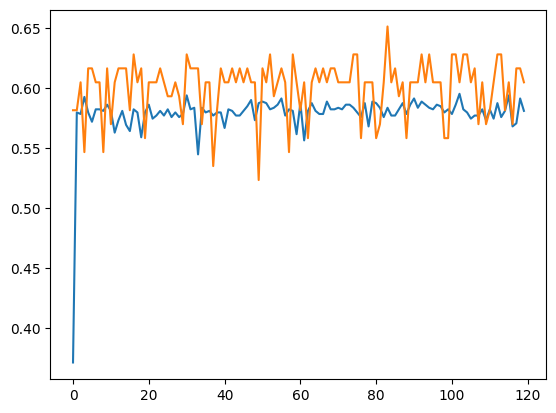

In [22]:
indexes = range(0,4)

model = Sequential()
model.add(Dense(200, activation='elu', input_shape=(len(indexes),)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train[:, indexes],
                    y_train,
                    epochs=120,
                    batch_size=20,
                    validation_data=(X_test[:, indexes], y_test))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

Epoch 1/120
39/39 [==============================] - 1s 7ms/step - loss: 8.1898 - accuracy: 0.3169 - val_loss: 5.9806 - val_accuracy: 0.4884
Epoch 2/120
39/39 [==============================] - 0s 3ms/step - loss: 3.8884 - accuracy: 0.5110 - val_loss: 1.8126 - val_accuracy: 0.3953
Epoch 3/120
39/39 [==============================] - 0s 3ms/step - loss: 1.5776 - accuracy: 0.3040 - val_loss: 1.6561 - val_accuracy: 0.2791
Epoch 4/120
39/39 [==============================] - 0s 4ms/step - loss: 1.5135 - accuracy: 0.2937 - val_loss: 1.5597 - val_accuracy: 0.2791
Epoch 5/120
39/39 [==============================] - 0s 4ms/step - loss: 1.5192 - accuracy: 0.2937 - val_loss: 1.5731 - val_accuracy: 0.2791
Epoch 6/120
39/39 [==============================] - 0s 4ms/step - loss: 1.5166 - accuracy: 0.2937 - val_loss: 1.5764 - val_accuracy: 0.2791
Epoch 7/120
39/39 [==============================] - 0s 4ms/step - loss: 1.5818 - accuracy: 0.2937 - val_loss: 1.6445 - val_accuracy: 0.2791
Epoch 8/120
3

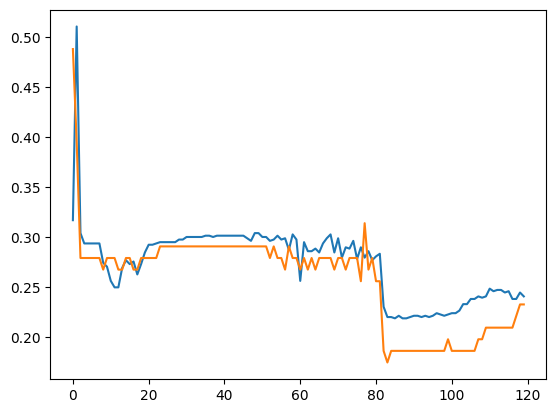

In [29]:
indexes = range(0,4)

model = Sequential()
model.add(Dense(100, activation='elu', input_shape=(len(indexes),)))
model.add(Dense(10, activation='elu'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train[:, indexes],
                    y_train,
                    epochs=120,
                    batch_size=20,
                    validation_data=(X_test[:, indexes], y_test))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()